<a href="https://colab.research.google.com/github/eip4-mars/EIP4P2/blob/master/Session2/EVA4P2_Session2_Mobilenetv2_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf eva4_lib
!git clone https://github.com/eip4-mars/eva4_lib.git

Cloning into 'eva4_lib'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 62 (delta 29), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [2]:
## Import Modules

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
from IPython.display import clear_output
from eva4_lib.utils.dataloader_folders import create_dataset_csv_split, getTestData, getTrainData
from eva4_lib.utils.range_test import lr_range_test
from eva4_lib.utils.train_test import fit_generator
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [3]:
## Model Tweak
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')

def model_reset():
    model = models.mobilenet_v2(pretrained=True)
    model.classifier[1] = nn.Linear(model.last_channel, 4)
    model = nn.Sequential(model, nn.LogSoftmax())
    model = model.to(device)
    summary(model, input_size=(3,224,224))

model_reset()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount =True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip /content/drive/My\ Drive/Session\ 2\ Dataset.zip
clear_output()

In [ ]:
!du -sh Session\ 2\ Dataset/

1.6G	Session 2 Dataset/


In [24]:
path = "/content/Session 2 Dataset/"
test_ratio = 0.2
out_path = '/content/'

create_dataset_csv_split(path, test_ratio, out_path)


100%|██████████| 4148/4148 [00:00<00:00, 7243.85it/s]


Train shape :  (16582, 2) , Test shape :  (4148, 2) , Labels shape :  (4, 2)
Files (train.csv, test.csv and labels.csv) generated in :  /content/


In [4]:
train_loader = getTrainData('train.csv',128)
test_loader = getTestData('test.csv',64)

  0%|          | 0/130 [00:00<?, ?it/s]

LR: 0.001


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
Loss=1.267850637435913 Batch_id=7 Accuracy=35.55:   6%|▌         | 8/130 [00:25<05:13,  2.57s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=1.1380987167358398 Batch_id=11 Accuracy=39.39:   9%|▉         | 12/130 [00:33<03:39,  1.86s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.9020001888275146 Batch_id=27 Accuracy=52.15:  22%|██▏       | 28/130 [01:08<03:19,  1.95s/it]/usr/local/lib/python3.6/dist-pa


Test set: Average loss: 0.4733, Accuracy: 3371/4148 (81.27%)

LR: 0.003


Loss=0.5059201121330261 Batch_id=11 Accuracy=80.34:   9%|▉         | 12/130 [00:34<04:03,  2.07s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5314619541168213 Batch_id=51 Accuracy=79.78:  40%|████      | 52/130 [02:07<02:38,  2.03s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.477433979511261 Batch_id=71 Accuracy=80.06:  55%|█████▌    | 72/130 [02:57<01:44,  1.80s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.47820472717285156 Batc


Test set: Average loss: 0.3813, Accuracy: 3496/4148 (84.28%)

LR: 0.005


Loss=0.535646378993988 Batch_id=7 Accuracy=82.03:   6%|▌         | 8/130 [00:23<05:01,  2.48s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.49238938093185425 Batch_id=17 Accuracy=82.90:  14%|█▍        | 18/130 [00:45<03:40,  1.97s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.384597510099411 Batch_id=109 Accuracy=82.48:  85%|████████▍ | 110/130 [04:21<00:35,  1.76s/it]/usr/local/lib/python3.6/dist


Test set: Average loss: 0.3664, Accuracy: 3552/4148 (85.63%)

LR: 0.007


Loss=0.5295524597167969 Batch_id=2 Accuracy=79.43:   2%|▏         | 3/130 [00:17<16:33,  7.82s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.468910276889801 Batch_id=11 Accuracy=81.90:   9%|▉         | 12/130 [00:35<03:50,  1.95s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.3641468286514282 Batch_id=15 Accuracy=82.81:  12%|█▏        | 16/130 [00:47<03:47,  2.00s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5557553768157959 Batch_i


Test set: Average loss: 0.3395, Accuracy: 3588/4148 (86.50%)

LR: 0.009000000000000001


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.2663573622703552 Batch_id=15 Accuracy=85.50:  12%|█▏        | 16/130 [00:44<04:09,  2.19s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.19349601864814758 Batch_id=16 Accuracy=85.94:  13%|█▎        | 17/130 [00:45<03:32,  1.88s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes shoul


Test set: Average loss: 0.3302, Accuracy: 3610/4148 (87.03%)

LR: 0.01


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.3987785279750824 Batch_id=3 Accuracy=86.72:   3%|▎         | 4/130 [00:14<09:28,  4.51s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.2856564521789551 Batch_id=9 Accuracy=86.48:   8%|▊         | 10/130 [00:32<05:51,  2.93s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.35028114914894104 Batch_id=29 Accuracy=86.56:  23%|██▎       | 30/130 [01:26<04:42,  2.82s/it]/usr/local/lib/python3.6/dist-


Test set: Average loss: 0.3246, Accuracy: 3606/4148 (86.93%)

LR: 0.03


Loss=0.34173348546028137 Batch_id=11 Accuracy=86.00:   9%|▉         | 12/130 [00:31<03:45,  1.91s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5646575093269348 Batch_id=20 Accuracy=84.15:  16%|█▌        | 21/130 [00:53<04:22,  2.41s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5351552963256836 Batch_id=57 Accuracy=81.16:  45%|████▍     | 58/130 [02:26<02:57,  2.47s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.35245200991630554 Ba


Test set: Average loss: 0.4599, Accuracy: 3381/4148 (81.51%)

LR: 0.05


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.4375258982181549 Batch_id=3 Accuracy=83.98:   3%|▎         | 4/130 [00:15<09:22,  4.47s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0


Test set: Average loss: 0.5236, Accuracy: 3304/4148 (79.65%)

LR: 0.07


Loss=0.4710504710674286 Batch_id=0 Accuracy=82.03:   1%|          | 1/130 [00:12<27:14, 12.67s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5313015580177307 Batch_id=21 Accuracy=78.37:  17%|█▋        | 22/130 [00:58<03:37,  2.02s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5001306533813477 Batch_id=38 Accuracy=78.45:  30%|███       | 39/130 [01:40<02:51,  1.89s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.6386712193489075 Batch_


Test set: Average loss: 0.6112, Accuracy: 3057/4148 (73.70%)

LR: 0.09


Loss=0.47041773796081543 Batch_id=6 Accuracy=77.12:   5%|▌         | 7/130 [00:20<06:00,  2.93s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.5014060139656067 Batch_id=7 Accuracy=77.44:   6%|▌         | 8/130 [00:24<06:23,  3.15s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.645252525806427 Batch_id=10 Accuracy=76.78:   8%|▊         | 11/130 [00:28<03:55,  1.98s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Loss=0.7513758540153503 Batch_id


Test set: Average loss: 60.5975, Accuracy: 796/4148 (19.19%)



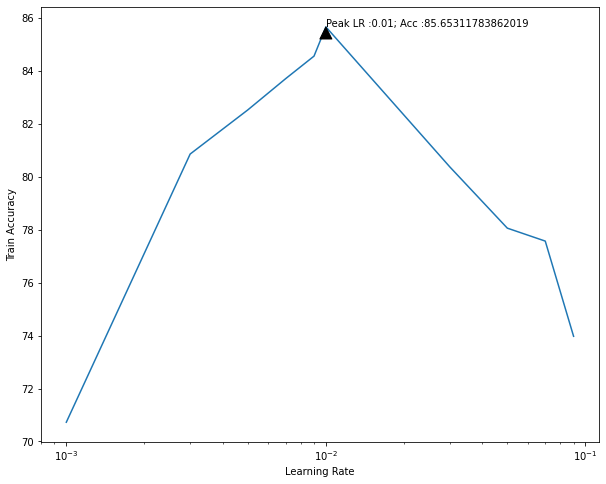

LRs used for range  test :  [0.001, 0.003, 0.005, 0.007, 0.009000000000000001, 0.01, 0.03, 0.05, 0.07, 0.09]
Train Accuracies :  [70.72729465685683, 80.85273187793993, 82.51718731154264, 83.69919189482572, 84.54951151851405, 85.65311783862019, 80.37028102762031, 78.05451694608612, 77.5660354601375, 73.9717766252563]
Test acc:  85.65311783862019 LR:  0.01


In [5]:
lrs = [j*(10**i) for i in range(-3,-1) for j in range(1,11,2)]

lr_range_test(lrs,model,device,train_loader, test_loader)

In [ ]:

optimizer = optim.SGD(model.parameters(), lr=0.01,  momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.01,  total_steps=20, pct_start=0.3, final_div_factor=1, div_factor=10)

fit_generator(model, device, train_loader, test_loader, optimizer, scheduler, start_epoch = 1, num_epoch = 5, plot_acc = True)


  0%|          | 0/130 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.0009999999999999992


Loss=1.2954535484313965 Batch_id=129 Accuracy=40.56: 100%|██████████| 130/130 [05:17<00:00,  2.44s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 1.3171, Accuracy: 1753/4148 (42.26%)

Epoch: 2 Learning_Rate 0.001859423525312735


Loss=1.3543144464492798 Batch_id=129 Accuracy=40.33: 100%|██████████| 130/130 [05:15<00:00,  2.43s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 1.2937, Accuracy: 1761/4148 (42.45%)

Epoch: 3 Learning_Rate 0.004109423525312736


Loss=1.2829608917236328 Batch_id=129 Accuracy=41.18: 100%|██████████| 130/130 [05:21<00:00,  2.47s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 1.2428, Accuracy: 1799/4148 (43.37%)

Epoch: 4 Learning_Rate 0.006890576474687262


Loss=1.1819852590560913 Batch_id=129 Accuracy=43.33: 100%|██████████| 130/130 [05:18<00:00,  2.45s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 1.1834, Accuracy: 1998/4148 (48.17%)

Epoch: 5 Learning_Rate 0.009140576474687263


Loss=1.2052946090698242 Batch_id=69 Accuracy=45.98:  53%|█████▎    | 69/130 [02:56<01:56,  1.92s/it]

In [ ]:
fail=[]
for eval_data, eval_target in test_loader:
  eval_data, eval_target = eval_data.to(device), eval_target.to(device)
  eval_out = model(eval_data)
  target_lbl=eval_target.cpu().numpy()
  pred_lbl=eval_out.argmax(1).cpu().numpy()
  #print(pred_lbl)
  #print(eval_target)
  for i in range(64):
    if target_lbl[i] != pred_lbl[i]:fail.append([eval_data[i].cpu(),target_lbl[i],pred_lbl[i],eval_out[i,target_lbl[i]].cpu(),eval_out()[i,pred_lbl[i]].cpu()])
  
  print('fail_count : '+str(len(fail)))
  if len(fail)>100: break

print('Returned Miscalssified images # : {}'.format(len(fail)))
print('** Note : If count of returned image is less than {}, then there arent enough misclassified images in the loader passed'.format(100))


  # fig = plt.figure(figsize=(16,16))
  # cnt=0
  # for i in fail[:25]:
  #   ax=fig.add_subplot(5, 5, cnt+1)
  #   img=np.squeeze(eval_data[i].cpu().numpy()[0])
  #   ax.imshow(img)
  #   cnt+=1
  #   ax.set_title("Actual : "+str(target_lbl[i])+"  Predicted : "+str(pred_lbl[i]))
  # plt.savefig('L1_Misclassified.png')
  # plt.show()

fail_count : 6
fail_count : 10
fail_count : 17


RuntimeError: ignored

In [ ]:
model.to(torch.device('cpu'))
model.eval()
traced_model = torch.jit.trace(model,torch.randn(1,3,244,244))
traced_model.save("Sess2_mobilenetv2_4.pt")

In [ ]:
torch.cuda.empty_cache()